## Transfer Learning using VGG19
In this notebook, we'll see how transfer learning can be applied to use the pretrained VGG19 network which has been trained over more than 14M images from the "Imagenet Dataset"

We'll start by importing the packages

In [51]:
import numpy as np
import scipy.io as sio
from keras.applications.vgg19 import VGG19
from PIL import Image
import PIL
import matplotlib.pyplot as plt
import json
%matplotlib inline

### The model
Keras.applications has a built model loader for VGG19.
Load the model and initialize random weights using the code line below:

In [52]:
model = VGG19(weights=None, include_top = True )
model.summary()

Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

As you can see in the model's summary, there are 24 layers in the above network.

### VGG19
Download the VGG19 network's trained weights and biases in ".mat" format from [here](https://www.vlfeat.org/matconvnet/models/imagenet-vgg-verydeep-19.mat)
#### Once Downloaded, we need to load the weights and biases from the downloaded **.mat** file to our keras model


In [53]:
vgg = sio.loadmat('imagenet-vgg-verydeep-19.mat')

### Decoding the 'imagenet-vgg-verydeep-19.mat'

The variable **vgg** above is a dictionary with the following indices:
1. \_\_header\_\_
2. \_\_version\_\_
3. \_\_globals\_\_
4. layers
5. meta

#### The weights and biases:
Are present in the value corresponding to **layers**.
#### The classes:
Are present in the value corresponding to **meta**. Lets extract the classes to a list named **classes**

In [54]:
classes = []
for class_idx in range(1000):
    classes.append(vgg['meta'][0][0][1][0][0][1][0][class_idx][0])

### Extracting the weights and biases
Our mat file has 42 layers but our keras model has only 26 layers. This is because each **Conv2D** layer in our keras model is 2 layers in the mat file, namely **conv2d** and **relu**.

Therefore, we describe a list **mat_indices** with the following property:
1. mat_indices\[i\] gives us the index of layer[i] in the mat file
2. mat_indices\[i\] = -1 if the layer at index **i** in our keras model doesn't have any weights or biases

##### By using this list, let's assign the weights and biases from the vgg_layers to our keras model

In [55]:
#reassigning model's weights from the downloaded vgg19 file
mat_indices = [-1, 0,2,-1, 5,7, -1,10,12,14,16, -1,19,21,23,25, -1,28,30,32,34, -1, -1, 37, 39, 41]
for i in range(1, 26):
    if mat_indices[i] >= 0:
        layer_index = mat_indices[i]
        b = vgg_layers[0][layer_index][0][0][2][0][1].reshape(model.layers[i].get_weights()[1].shape)
        w = vgg_layers[0][layer_index][0][0][2][0][0].reshape(model.layers[i].get_weights()[0].shape)
        model.layers[i].set_weights([w, b])

### Using the model to classify images
We're done setting up the model. Lets use this pretrained model to classify a shark image.
##### Note that our model takes images of shape (224, 224, 3). Hence, reshape your image before passing it to the model

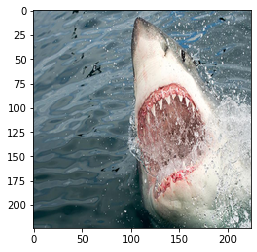

In [56]:
img = Image.open('shark.jpg')
img = img.resize((224, 224), PIL.Image.ANTIALIAS)
img_array = (np.asarray(img)).reshape(1, 224, 224, 3)
plt.imshow(img_array[0])

In [58]:
predicted_vector = model.predict(img_array).reshape(-1)
print("predicted class: ", classes[predicted_vector.argmax()])
print("with confidence: ", predicted_vector[predicted_vector.argmax()]*100, "%")

predicted class:  great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
with confidence:  99.90185499191284 %


## Thanks for going through this notebook!
### For any further clarifications, feel free to w